In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sf = pd.read_csv("C:\\Users\\arabiu\\Documents\\customer_shopping_data_TDI.csv")

In [3]:
sf.head()

,invoice_no,customer_id,gender,age,category,quantity,price,Total Amount,payment_method,Invoice_Date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,300.08,1500.40,Credit Card,08/05/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,600.17,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,300.08,Cash,11/09/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,600.17,3000.85,Credit Card,5/16/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,15.15,60.60,Cash,10/24/2021,Kanyon


In [4]:
sf.shape

(99457, 11)

In [5]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   Total Amount    99457 non-null  float64
 8   payment_method  99457 non-null  object 
 9   Invoice_Date    99457 non-null  object 
 10  shopping_mall   99457 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 8.3+ MB


In [6]:
sf.describe()

,age,quantity,price,Total Amount
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,229.280048,689.256321
std,14.990054,1.413025,266.047550,941.184567
min,18.000000,1.000000,5.230000,5.230000
25%,30.000000,2.000000,35.840000,45.450000
50%,43.000000,3.000000,40.660000,203.300000
75%,56.000000,4.000000,300.080000,1200.320000
max,69.000000,5.000000,1050.000000,5250.000000


## 1. What is the total number of invoice in the dataset

In [7]:
sf["invoice_no"].nunique()

99457

## 2. How many unique customers are there

In [12]:
sf["customer_id"].nunique()

99457

## 3. What is the average age of customers?

In [8]:
sf["age"].mean()

43.42708909377922

# Categorical Analysis

## 4. What are the unique categories of items in the dataset?

In [9]:
sf.category.value_counts().index

Index(['Clothing', 'Cosmetics', 'Food & Beverage', 'Toys', 'Shoes', 'Souvenir',
       'Technology', 'Books'],
      dtype='object', name='category')

## 5. What category has the highest quantity sold?

<function matplotlib.pyplot.show(close=None, block=None)>

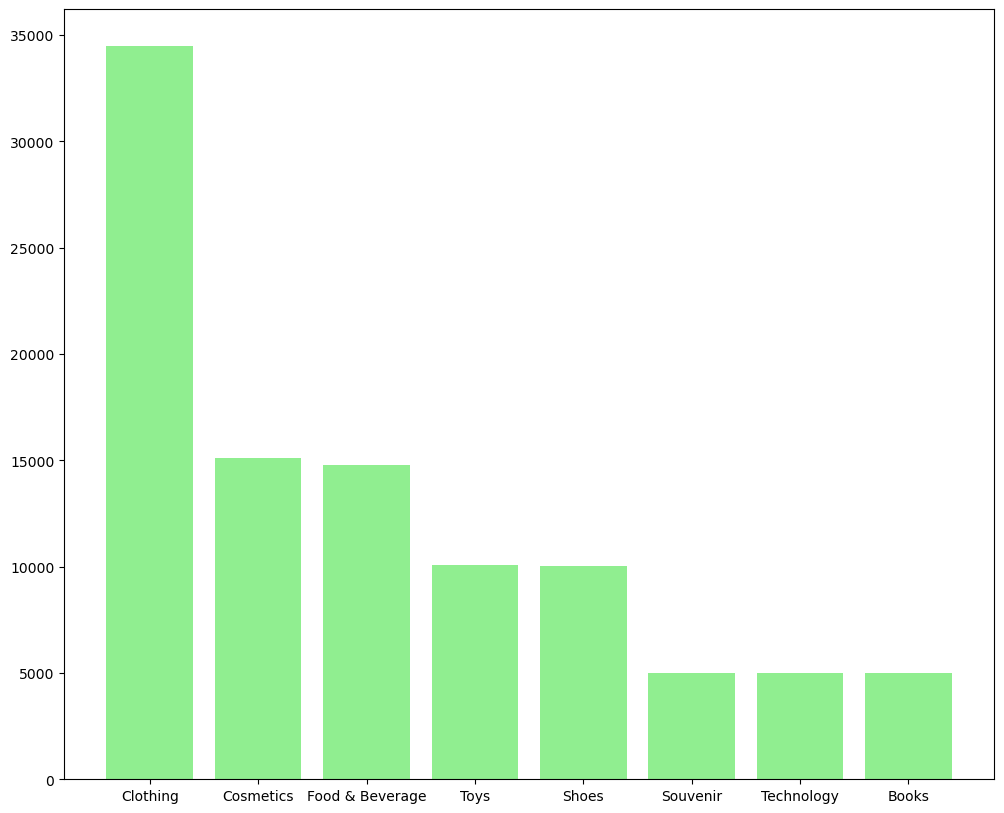

In [21]:
item = sf.category.value_counts()

plt.figure(figsize=(12,10))
plt.bar(x=item.index, height=item.values, color="lightgreen")
plt.show

## 6.Can you find the average price for each category

In [14]:
sf.groupby("category")["price"].mean()

category
Books                15.15
Clothing            300.08
Cosmetics            40.66
Food & Beverage       5.23
Shoes               600.17
Souvenir             11.73
Technology         1050.00
Toys                 35.84
Name: price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

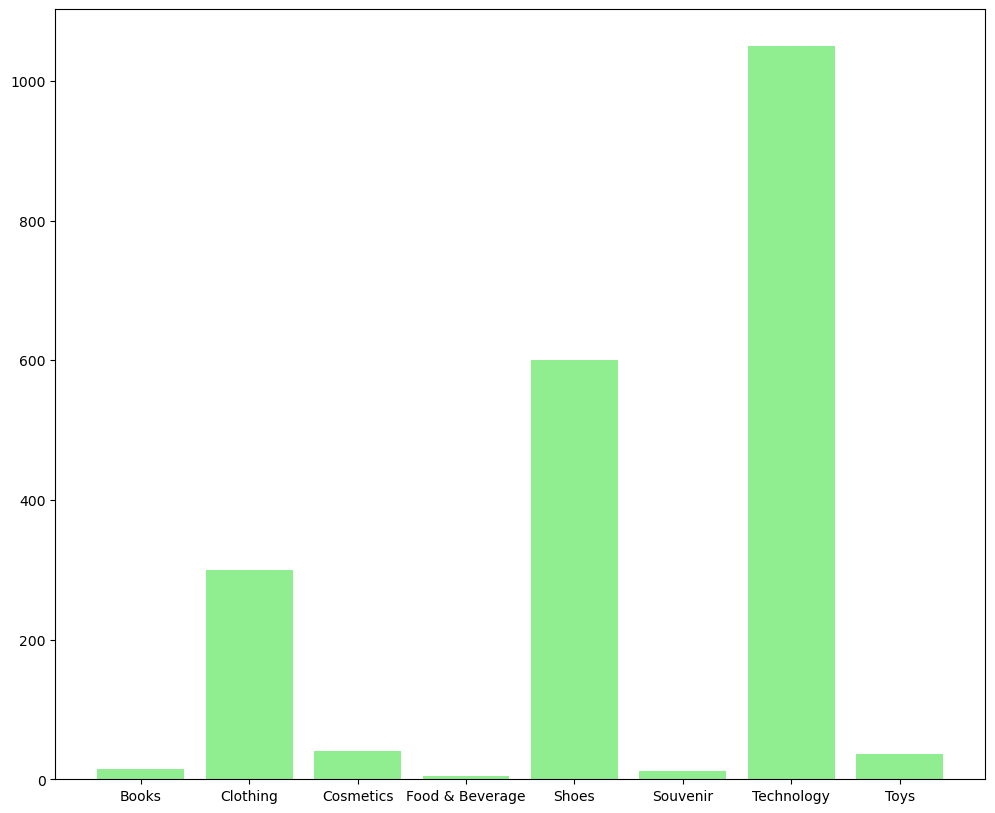

In [20]:
#Average Price for the item category
avg_item_price = sf.groupby("category")["price"].mean()

plt.figure(figsize=(12,10))
plt.bar(x=avg_item_price.index, height=avg_item_price.values, color="lightgreen")
plt.show

# Payment Method Distribution

## What are the different payment method used?

In [26]:
sf.payment_method.value_counts().index

Index(['Cash', 'Credit Card', 'Debit Card'], dtype='object', name='payment_method')

## Create a pie chart to represent the distribution of payment methods?

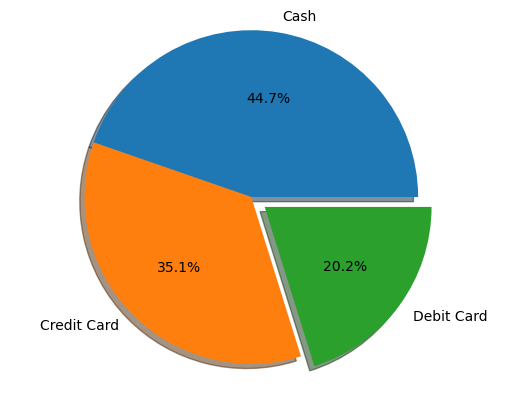

In [16]:
#Get the distribution for each payment method
pm = sf.payment_method.value_counts()

explode=(0,0,0.1)

#Plot the pie chart

fig,ax = plt.subplots()

plt.pie(pm, labels= pm.index, autopct ="%1.1f%%",explode=explode,shadow=True)

# Equal aspect ratio ensures that the pie chart is circular.
ax.axis('equal')


plt.show()

# Shopping Mall Insight

## Which shopping mall has the most transactions

<function matplotlib.pyplot.show(close=None, block=None)>

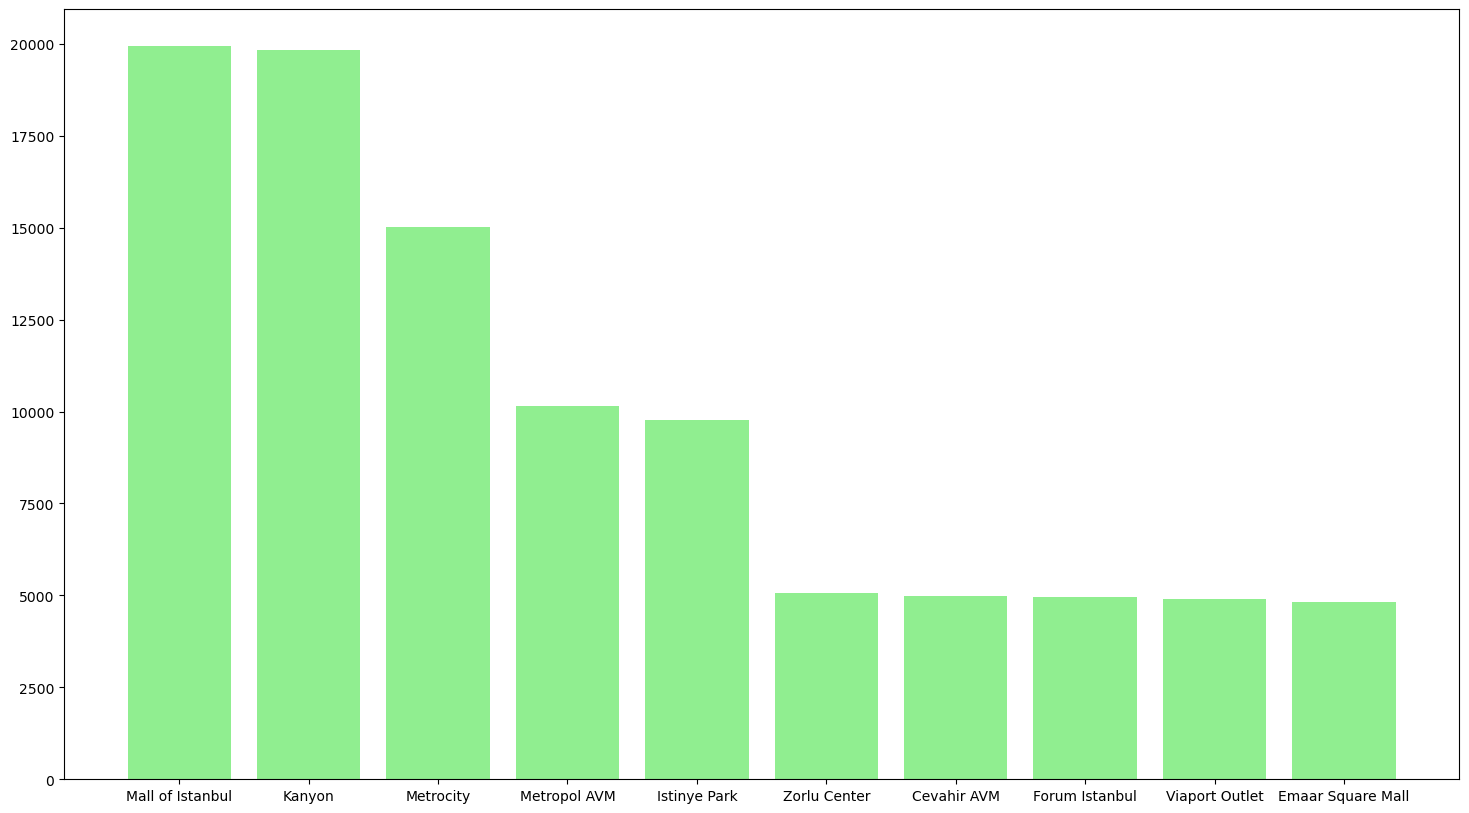

In [19]:
shop_tran = sf.shopping_mall.value_counts()

plt.figure(figsize=(18,10))
plt.bar(x=shop_tran.index, height=shop_tran.values, color="lightgreen")
plt.show

In [42]:
sf.groupby("shopping_mall")["quantity"].mean()

shopping_mall
Cevahir AVM          2.995191
Emaar Square Mall    3.014134
Forum Istanbul       3.002224
Istinye Park         3.012473
Kanyon               2.999395
Mall of Istanbul     3.014291
Metrocity            2.990740
Metropol AVM         3.004626
Viaport Outlet       2.994709
Zorlu Center         3.001773
Name: quantity, dtype: float64

# Temporal Analysis

In [3]:
#Converting invoice date to datetime
sf['Invoice_Date'] = pd.to_datetime(sf['Invoice_Date'])

# Now you can use the .dt accessor
sf['Month'] = sf['Invoice_Date'].dt.to_period('M')


In [4]:

sf['Month'] = sf['Month'].dt.strftime('%B')

In [34]:
invoices_per_month = sf['Month'].value_counts()
avg_month_rev = sf.groupby("Month")["Total Amount"].sum()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' index to categorical type with the defined order
avg_month_rev.index = pd.Categorical(avg_month_rev.index, categories=month_order, ordered=True)

# Sort the DataFrame based on the categorical index
avg_month_rev = avg_month_rev.sort_index()

avg_month_rev

January      7932626.63
February     7235297.32
March        6007346.21
April        5102478.76
May          5346926.82
June         5160345.74
July         5552023.57
August       5270542.03
September    5115214.27
October      5538258.09
November     4995141.11
December     5295165.36
Name: Total Amount, dtype: float64

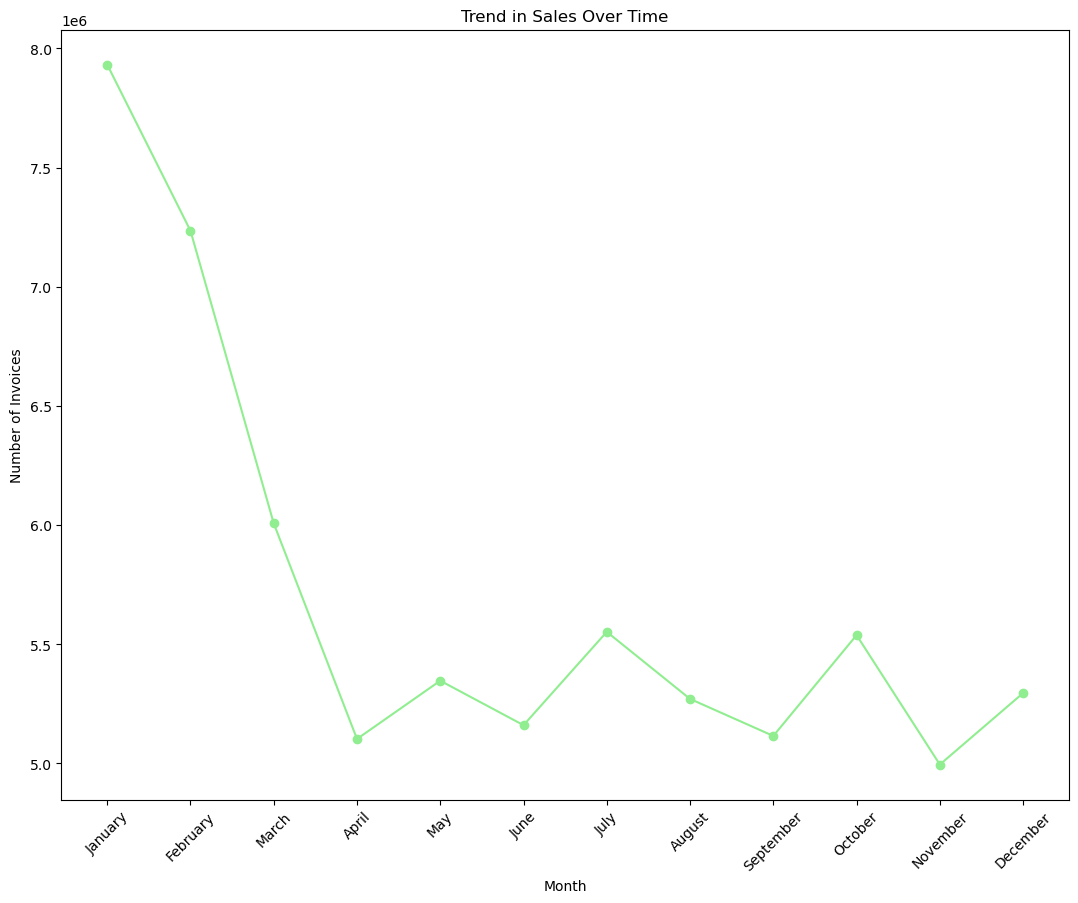

In [39]:
plt.figure(figsize=(13,10))

# Plotting the line chart
plt.plot(avg_month_rev.index.astype(str), avg_month_rev.values, marker='o', linestyle='-', color="lightgreen")

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.title('Trend in Sales Over Time')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the line chart
plt.show()

# Customer Gender Distribution

In [40]:
gender_distribution = sf['gender'].value_counts()

gender_distribution

gender
Female    59482
Male      39975
Name: count, dtype: int64

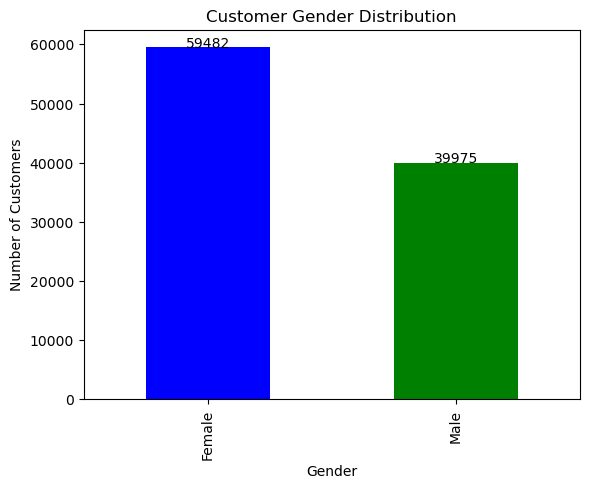

In [41]:
# Plotting the bar chart
gender_distribution.plot(kind='bar', color=['blue', 'green'])

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Customer Gender Distribution')

# Adding data labels
for i, value in enumerate(gender_distribution):
    plt.text(i, value + 0.1, str(value), ha='center')

# Display the bar chart
plt.show()


In [42]:
total_revenue = sf['Total Amount'].sum()

print(f'Total Revenue: #{total_revenue:.2f}')



Total Revenue: #68551365.91


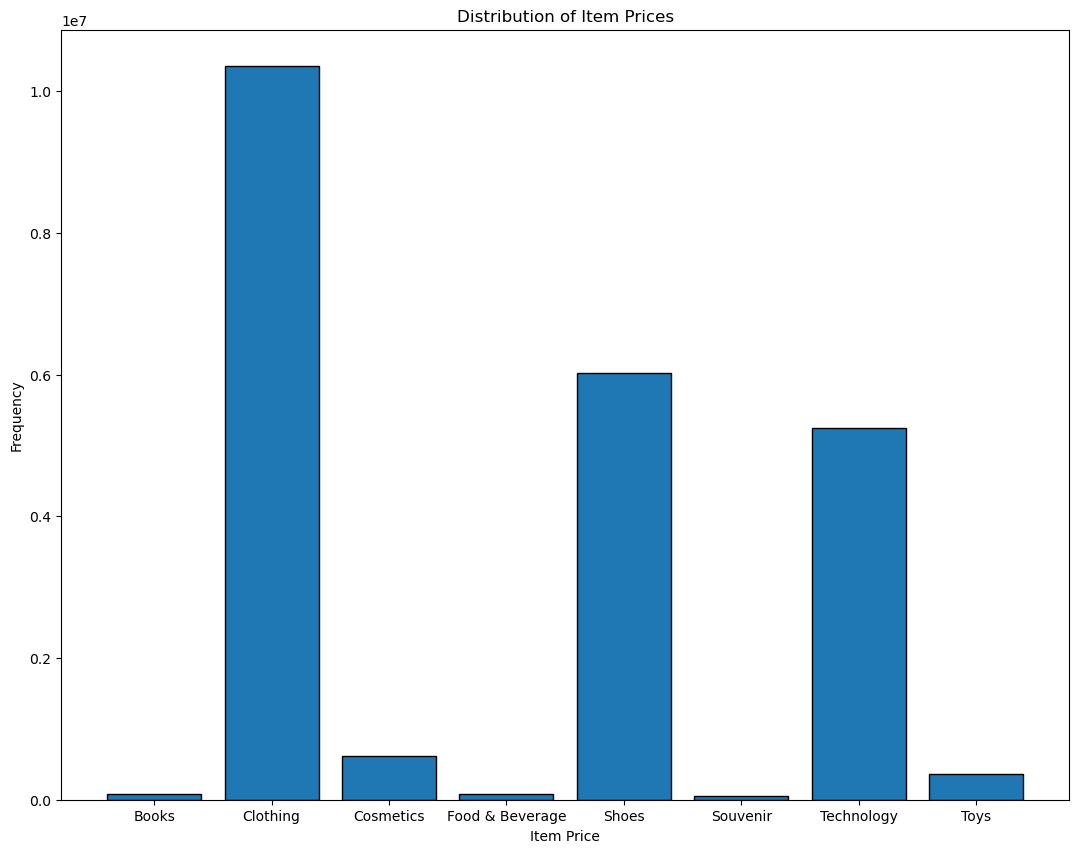

In [46]:

dis_item_price = sf.groupby("category")["price"].sum()

plt.figure(figsize=(13,10))
# Plotting the histogram
plt.bar(dis_item_price.index, height=dis_item_price.values, edgecolor='black')

# Adding labels and title
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.title('Distribution of Item Prices')

# Display the histogram
plt.show()


In [47]:
age_bins = [18, 30, 40, 50, 60,70]
age_labels = ['18-30', '31-40', '41-50', '51-60','61-70']
sf['AgeGroup'] = pd.cut(sf['age'], bins=age_bins, labels=age_labels, right=False)


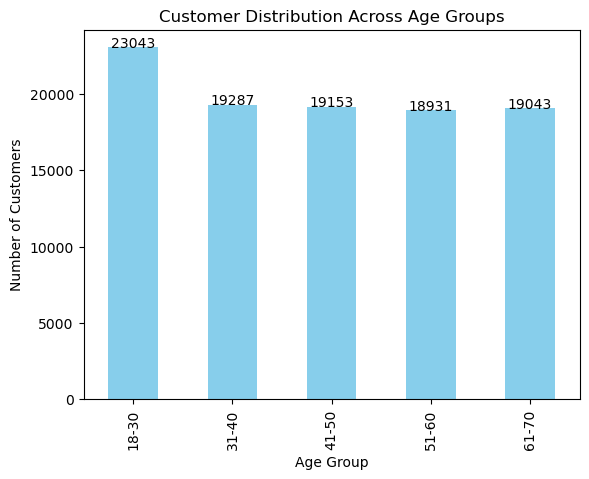

In [52]:
age_group_distribution = sf['AgeGroup'].value_counts().sort_index()
age_dis_rev = sf.groupby("AgeGroup")["Total Amount"].sum()

# Plotting the bar chart
age_group_distribution.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution Across Age Groups')

# Adding data labels
for i, value in enumerate(age_group_distribution):
    plt.text(i, value + 0.1, str(value), ha='center')

# Display the bar chart
plt.show()


In [54]:
age_quantity = sf.groupby("AgeGroup")["quantity"].sum()
age_quantity

AgeGroup
18-30    69245
31-40    57875
41-50    57517
51-60    56922
61-70    57153
Name: quantity, dtype: int64

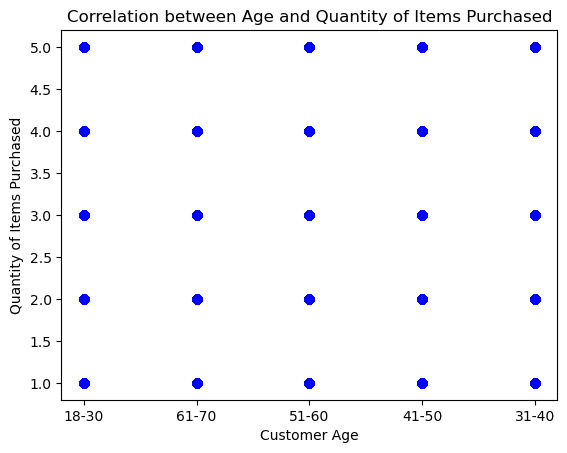

In [55]:
# Plotting the scatter plot
plt.scatter(sf['AgeGroup'], sf['quantity'], alpha=0.5, color='blue')

# Adding labels and title
plt.xlabel('Customer Age')
plt.ylabel('Quantity of Items Purchased')
plt.title('Correlation between Age and Quantity of Items Purchased')

# Display the scatter plot
plt.show()


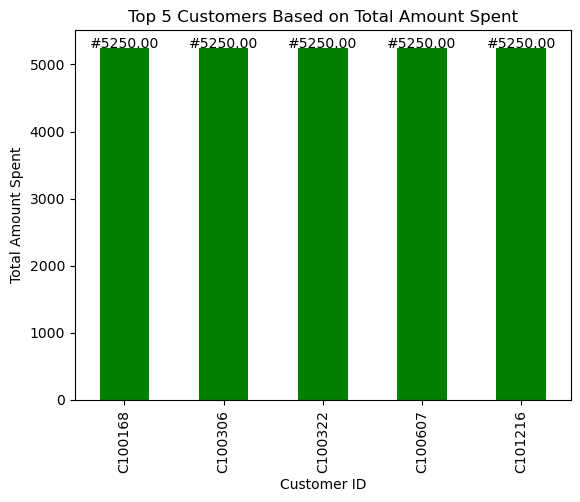

In [57]:
# Group by customer and calculate the total amount spent by each customer
customer_spending = sf.groupby('customer_id')['Total Amount'].sum()

# Select the top 5 customers
top_5_customers = customer_spending.nlargest(5)

# Create a bar chart
top_5_customers.plot(kind='bar', color='green')

# Adding labels and title
plt.xlabel('Customer ID')
plt.ylabel('Total Amount Spent')
plt.title('Top 5 Customers Based on Total Amount Spent')

# Adding data labels
for i, value in enumerate(top_5_customers):
    plt.text(i, value + 0.1, f'#{value:.2f}', ha='center')

# Display the bar chart
plt.show()


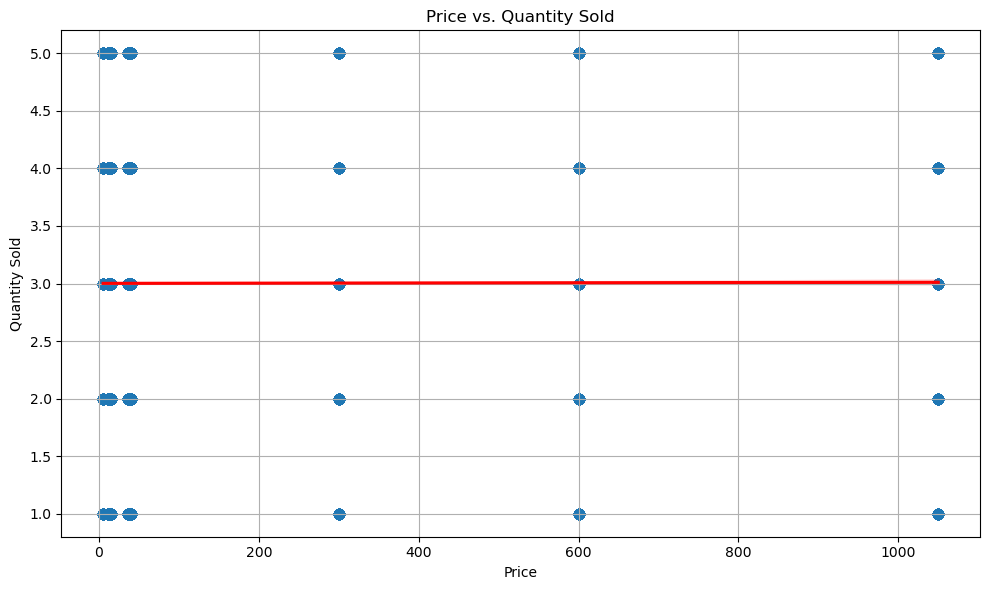

In [68]:
# Create a scatter plot with trendline
plt.figure(figsize=(10, 6))
sns.regplot(x='price', y='quantity', data=sf, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Price vs. Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\arabiu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


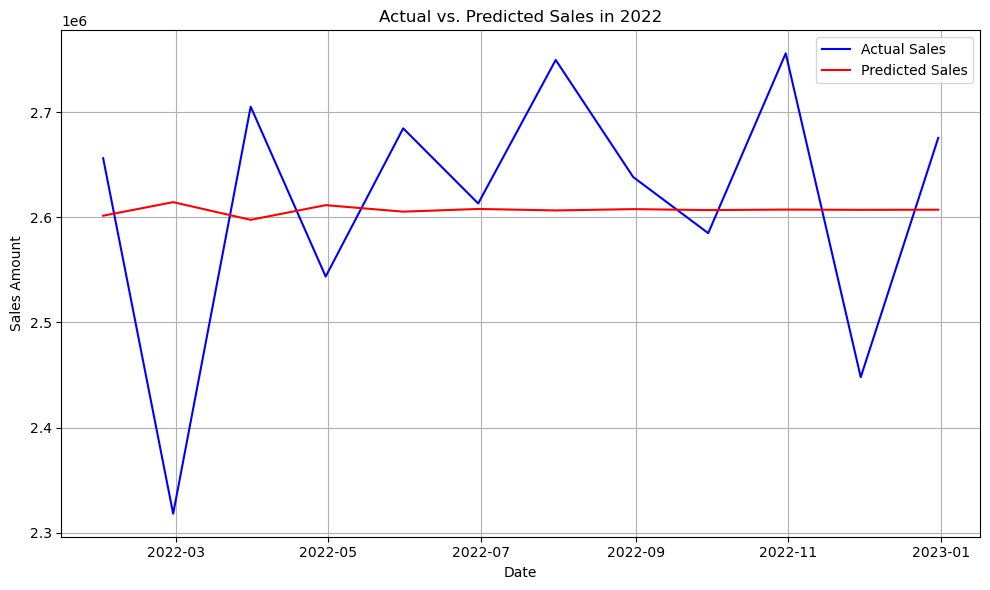

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Aggregate sales data on a monthly basis
monthly_sales = sf.resample('M', on='Invoice_Date').sum()

# Filter data for 2021 for training and 2022 for testing
train_data = monthly_sales[monthly_sales.index.year == 2021]
test_data = monthly_sales[monthly_sales.index.year == 2022]


# Train ARIMA model
p, d, q = 5, 1, 0  # Example values, you should choose appropriate values based on your data
model = ARIMA(train_data['Total Amount'], order=(p, d, q))
fit_model = model.fit()

# Make predictions for 2022
forecast = fit_model.forecast(steps=len(test_data))

# Plot actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['Total Amount'], label='Actual Sales', color='blue')
plt.plot(test_data.index, forecast, label='Predicted Sales', color='red')
plt.title('Actual vs. Predicted Sales in 2022')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
# Create DataFrames for predicted and actual sales
predicted_sales = pd.DataFrame({'Invoice_Date': test_data.index, 'Predicted_Sales': forecast})
actual_sales = pd.DataFrame({'Invoice_Date': test_data.index, 'Actual_Sales': test_data['Total Amount']})

# Print  the predicted and actual sales DataFrames
print(predicted_sales)
print(actual_sales)

           Invoice_Date  Predicted_Sales
2022-01-31   2022-01-31     2.601501e+06
2022-02-28   2022-02-28     2.614379e+06
2022-03-31   2022-03-31     2.597587e+06
2022-04-30   2022-04-30     2.611525e+06
2022-05-31   2022-05-31     2.605342e+06
2022-06-30   2022-06-30     2.607923e+06
2022-07-31   2022-07-31     2.606504e+06
2022-08-31   2022-08-31     2.607742e+06
2022-09-30   2022-09-30     2.606825e+06
2022-10-31   2022-10-31     2.607318e+06
2022-11-30   2022-11-30     2.607071e+06
2022-12-31   2022-12-31     2.607207e+06
             Invoice_Date  Actual_Sales
Invoice_Date                           
2022-01-31     2022-01-31    2656149.96
2022-02-28     2022-02-28    2318201.08
2022-03-31     2022-03-31    2705190.76
2022-04-30     2022-04-30    2543653.14
2022-05-31     2022-05-31    2684556.89
2022-06-30     2022-06-30    2613106.01
2022-07-31     2022-07-31    2749554.99
2022-08-31     2022-08-31    2638238.71
2022-09-30     2022-09-30    2584908.39
2022-10-31     2022-10-31  

In [11]:
# Export predicted and actual sales data to CSV
predicted_sales.to_csv('predicted_sales.csv', index=False)
actual_sales.to_csv('actual_sales.csv', index=False)